# Line Producer Script Breakdown 

In film production, a line producers job is to decide where funds should be alocated according to the script. With this being said, in order to make their job easier I will breake down the script in a way that they cann easily dispurse the funds. 

In [221]:
# import needed libraries 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup as BS 
import requests 
import csv
import re
import seaborn as sns 
from keras.preprocessing.text import Tokenizer, one_hot 
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
import matplotlib.pyplot as plt 

Scrape scripts from IMSDB using Beautiful Soup

In [421]:
# URL to the raw script
help_url =  'https://www.imsdb.com/scripts/Help,-The.html'

In [3]:
def pull_requests(page):
#scrapes a website using beautiful soup    
    source = requests.get(page).text
    soup = BS(source,'html.parser')
    return soup
 
    
help_req = pull_requests(help_url)



Clean scripts and prepare them for modeling.

In [422]:
help_script = help_req.find('td', class_= 'scrtext')
help_script

<td class="scrtext">
<pre>

 
<b>                                 THE HELP
</b>
                         


                                Written by

                               Tate Taylor                     

                         

                         
                           Based on the novel by
           
                             Kathryn Stockett

                         

                         

                         

                         
                                                      Second Draft,
                                                  November 9, 2009

          WILLIAM FAULKNER wrote of Mammy Callie after her death:

                         
          "...she gave to my family a fidelity without stint or
          calculation or recompense and gave to my childhood an
          immeasurable devotion and love".

<b>          JACKSON, MISSISSIPPI 1963
</b>
                         

<b>          INT. AIBILEEN'S HOUSE - KITCHE

In [5]:
#pull the text out of the script 

help_script = help_script.get_text()

help_script

'\n           \n          \n          \n                                        AVATAR\n          \n          \n          \n          \n                                      Written by\n          \n                                    James Cameron\n          \n          \n          \n          \n          \n          THE SOUND OF DRUMS, from a great distance, growing louder.\n          \n          FADE IN:\n          \n          WE ARE FLYING through mist, a dimly glimpsed forest below.\n          \n                               VOICE (V.O.)\n                     When I was lying there in the VA\n                     hospital, with a big hole blown through\n                     the middle of my life, I started having\n                     these dreams of flying.\n          \n          We are very low over the forest now, gliding fast, the drums\n          BUILDING to a PEAK --\n          \n                               VOICE (V.O.)\n                     Sooner or later though, you al

In [6]:
#remove leading spaces from the scripts
c_help_script =re.sub(r'\s+', ' ', help_script) 
c_help_script

' THE HELP Written by Tate Taylor Based on the novel by Kathryn Stockett Second Draft, November 9, 2009 WILLIAM FAULKNER wrote of Mammy Callie after her death: "...she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love". JACKSON, MISSISSIPPI 1963 INT. AIBILEEN\'S HOUSE - KITCHEN - NIGHT AIBILEEN, black, 53, sits at a table in a small, green kitchen. She wears a yellow dress with black piping and grips a tattered spiral notebook. Although cracked, the window behind her is crystal clear. Three framed portraits hang on the wall above her: John F. Kennedy, Dr. Martin Luther King, Jr. and an UNKNOWN YOUNG BLACK MALE wearing thick glasses. Aibileen swallows hard. AIBILEEN I was...born in 1911...on Piedmont Plantation in Cherokee County. An UNSEEN WOMAN interviews Aibileen. WOMAN (O.C.) Did you know as a girl, growing up, that one day you\'d be a maid? AIBILEEN Yes, ma\'am. I did. WOMAN (O.C.) And you knew that be

In [432]:
#Use regular expressions to figure out pull out the scene settings
locations = []
pattern = re.compile(r'(INT|EXT).\s([A-Z]\w*.?\w?\s)?([A-Z]?\w*)?([A-Z]?\w*)?(\s.\s)([A-Z]?\w*)?([A-Z]?\w*)?([A-Z]?\w*)?(\s.\s)([A-Z]?\w*.?\w?\s)?([A-Z][A-Z]?\w*.?\w?\s)?([A-Z][A-Z]\w*.?\w?\s)?')
matches = pattern.finditer(c_help_script)
for match in matches:
    print(match)
#print matches to get the location of the  
    locations.append(match.group(0))
locations

<_sre.SRE_Match object; span=(326, 376), match="INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILEEN,>
<_sre.SRE_Match object; span=(6798, 6846), match='INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILLY '>
<_sre.SRE_Match object; span=(11866, 11910), match='INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER '>
<_sre.SRE_Match object; span=(15420, 15470), match='INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibileen>
<_sre.SRE_Match object; span=(19522, 19562), match='EXT. FOOTE ESTATE - BACKYARD - SAME DAY '>
<_sre.SRE_Match object; span=(21022, 21067), match='INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY '>
<_sre.SRE_Match object; span=(33712, 33761), match='INT. PHELAN PLANTATION - KITCHEN - MOMENTS LATER >
<_sre.SRE_Match object; span=(36790, 36835), match='INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY '>
<_sre.SRE_Match object; span=(40229, 40278), match='INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Raleigh >
<_sre.SRE_Match object; span=(40800, 40843), match='INT. HOLBROOK HOUSE - DEN - LATER THAT DAY '>

["INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILEEN, ",
 'INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILLY ',
 'INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER ',
 'INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibileen ',
 'EXT. FOOTE ESTATE - BACKYARD - SAME DAY ',
 'INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY ',
 'INT. PHELAN PLANTATION - KITCHEN - MOMENTS LATER ',
 'INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY ',
 'INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Raleigh ',
 'INT. HOLBROOK HOUSE - DEN - LATER THAT DAY ',
 'INT. HOLBROOK HOUSE - BATHROOM - SECONDS LATER ',
 "INT. AIBILEEN'S HOME - KITCHEN - NIGHT Aibileen ",
 "INT. MINNY'S HOUSE - HALLWAY - MOMENTS LATER MINNY ",
 "INT. AIBILEEN'S HOUSE - KITCHEN - CONTINUOUS Aibileen ",
 "INT. AIBILEEN'S HOUSE - KITCHEN - MOMENTS LATER ",
 "INT. AIBILEEN'S HOUSE - KITCHEN - MOMENTS LATER AIBILEEN ",
 "INT. MINNY'S HOUSE - KITCHEN - MORNING Minny ",
 'INT. FOOTE ESTATE - KITCHEN - MOMENTS LATER ',
 'INT. FOOTE ESTATE - KITCHEN - SECONDS LATER ',
 "IN

In [131]:
# create a series out of the scene locations 
locations_df = pd.DataFrame(locations, columns=['location'])
locations_df

,location
0,INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILE...
1,INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILLY
2,INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER
3,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibil...
4,EXT. FOOTE ESTATE - BACKYARD - SAME DAY
5,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY
6,INT. PHELAN PLANTATION - KITCHEN - MOMENTS LATER
7,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY
8,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Raleigh
9,INT. HOLBROOK HOUSE - DEN - LATER THAT DAY


In [132]:
locations_dft = locations_df 

In [133]:
#split the series at the dashes 
locations_dft = locations_dft["location"].str.split(".  | -")


In [11]:
type(locations_dft[1][1])

str

In [301]:
setting = []
where = []
time_of_day = []
for location in locations_dft:
    #split the scene into portions 
    if type(location[0]) == str:
        setting.append(location[0])
    else:
        pass
    if type(location[1]) == str:
        where.append(location[1])
    else:
        pass
   
    try: 
        time_of_day.append(location[2])
    except IndexError:
        time_of_day.append('na')
    #int_ext.append(location[0])
    #time_of_day.append(location[2])
    #where.append(location[1])



In [302]:
#create a dataframe from the portions
locations_dft1 = pd.DataFrame({'setting':setting,'where':where,'time_of_day':time_of_day})
locations_dft1

,setting,where,time_of_day
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,"
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY


At a quick glance, this dataframe is interesting because you can see that the whole story takes place in a few areas, over the course of a few days. 

In [303]:
loc_df1 = locations_dft1
loc_df1.describe()


,setting,where,time_of_day
count,59,59,59
unique,12,14,28
top,INT. AIBILEEN'S HOUSE,KITCHEN,MOMENTS LATER
freq,12,35,16


### There are 59 scenes in this film in 12 different locations

In [304]:
loc_df1['setting'].unique()

array(["INT. AIBILEEN'S HOUSE", 'INT. HOLBROOK HOUSE',
       'INT. LEEFOLT HOME', 'EXT. FOOTE ESTATE', 'INT. PHELAN PLANTATION',
       "INT. AIBILEEN'S HOME", "INT. MINNY'S HOUSE", 'INT. FOOTE ESTATE',
       'EXT. PHELAN PLANTATION', 'EXT. LEEFOLT HOME', 'INT. BUS',
       'EXT. CHICAGO'], dtype=object)

In [305]:
#create a list of the location where the scenes start
scene = [(326, 376),
(6798, 6846),
(11866, 11910),
(15420, 15470),
(19522, 19562),
(21022, 21067),
(33712, 33761),
(36790, 36835),
(40229, 40278),
(40800, 40843),
(41948, 41995),
(46596, 46644),
(47623, 47674),
(47853, 47907),
(50242, 50290),
(52919, 52976),
(55747, 55792),
(57882, 57926),
(60649, 60693),
(61348, 61398),
(61849, 61900),
(64956, 65002),
(65445, 65491),
(68644, 68686),
(69833, 69880),
(70987, 71036),
(72237, 72291),
(73094, 73142),
(74251, 74298),
(85133, 85180),
(91917, 91960),
(96777, 96822),
(100109, 100153),
(100725, 100771),
(102326, 102373),
(105776, 105816),
(107366, 107411),
(107746, 107795),
(108603, 108651),
(109495, 109543),
(116975, 117026),
(119802, 119850),
(130606, 130651),
(131794, 131838),
(133814, 133865),
(134295, 134347),
(137231, 137280),
(138981, 139028),
(140158, 140205),
(145824, 145845),
(146366, 146412),
(147288, 147335),
(148434, 148486),
(150508, 150557),
(161278, 161325),
(166580, 166621),
(166973, 167010),
(167269, 167306),
(167549, 167595)]
#the secenes start where the script 
scene_start = [376,
6846,
11910,
15470,
19562,
21067,
33761,
36835,
40278,
40843,
41995,
46644,
47674,
47907,
50290,
52976,
55792,
57926,
60693,
61398,
61900,
65002,
65491,
68686,
69880,
71036,
72291,
73142,
74298,
85180,
91960,
96822,
100153,
100771,
102373,
105816,
107411,
107795, 
108651, 
109543, 
117026, 
119850, 
130651, 
131838, 
133865, 
134347, 
137280, 
139028, 
140205,
145845, 
146412, 
147335, 
148486, 
150557, 
161325, 
166621, 
167010,
167306, 
167595]

loc_df1['scene'] = scene


In [306]:
#seperate the start of the scene from the end of the scene 
scene_start = []
scene_end = []
for i in loc_df1['scene']:
    scene_start.append(i[1])
    scene_end.append(i[0])
scene_end

[326,
 6798,
 11866,
 15420,
 19522,
 21022,
 33712,
 36790,
 40229,
 40800,
 41948,
 46596,
 47623,
 47853,
 50242,
 52919,
 55747,
 57882,
 60649,
 61348,
 61849,
 64956,
 65445,
 68644,
 69833,
 70987,
 72237,
 73094,
 74251,
 85133,
 91917,
 96777,
 100109,
 100725,
 102326,
 105776,
 107366,
 107746,
 108603,
 109495,
 116975,
 119802,
 130606,
 131794,
 133814,
 134295,
 137231,
 138981,
 140158,
 145824,
 146366,
 147288,
 148434,
 150508,
 161278,
 166580,
 166973,
 167269,
 167549]

In [307]:
#The end of one scene signals the beginning of another. I have to adjust the end of the scene charecters
scene_end.remove(326)
scene_end.append(169129)
scene_end

[6798,
 11866,
 15420,
 19522,
 21022,
 33712,
 36790,
 40229,
 40800,
 41948,
 46596,
 47623,
 47853,
 50242,
 52919,
 55747,
 57882,
 60649,
 61348,
 61849,
 64956,
 65445,
 68644,
 69833,
 70987,
 72237,
 73094,
 74251,
 85133,
 91917,
 96777,
 100109,
 100725,
 102326,
 105776,
 107366,
 107746,
 108603,
 109495,
 116975,
 119802,
 130606,
 131794,
 133814,
 134295,
 137231,
 138981,
 140158,
 145824,
 146366,
 147288,
 148434,
 150508,
 161278,
 166580,
 166973,
 167269,
 167549,
 169129]

In [308]:
loc_df1['scene_end'] = scene_end
loc_df1

,setting,where,time_of_day,scene,scene_end
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",6798
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",11866
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",15420
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",19522
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",21022
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",33712
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",36790
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",40229
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40800
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",41948


In [309]:
#Add the script to the data fame 
loc_df1['script_with_apply'] = loc_df1.apply(lambda row: c_help_script[int(row["scene"][0]): int(row["scene_end"])], axis='columns')
loc_df1

,setting,where,time_of_day,scene,scene_end,script_with_apply
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",6798,INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILE...
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",11866,INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILL...
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",15420,INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER Mi...
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",19522,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibil...
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",21022,EXT. FOOTE ESTATE - BACKYARD - SAME DAY Celia ...
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",33712,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY B...
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",36790,INT. PHELAN PLANTATION - KITCHEN - MOMENTS LAT...
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",40229,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY S...
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40800,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Ralei...
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",41948,INT. HOLBROOK HOUSE - DEN - LATER THAT DAY The...


In [310]:
#count the words in each scene 
scene_word_count = []
for i in loc_df1['script_with_apply']:
    a = re.sub(r"[^a-zA-Z0-9]+", ' ', i)
    scene_word_count.append(len(word_tokenize(a)))
scene_word_count

[1169,
 915,
 644,
 737,
 273,
 2229,
 570,
 632,
 98,
 207,
 811,
 191,
 40,
 434,
 501,
 516,
 417,
 532,
 133,
 95,
 576,
 91,
 595,
 232,
 201,
 220,
 154,
 204,
 2010,
 1247,
 897,
 613,
 116,
 312,
 618,
 303,
 69,
 149,
 167,
 1380,
 522,
 1981,
 244,
 368,
 88,
 503,
 323,
 217,
 1043,
 101,
 170,
 213,
 367,
 2004,
 990,
 74,
 57,
 48,
 292]

It is interesting to see how long each scene it helps with determining how to distrbute money.

In [311]:
#add word count to the dataframe 
loc_df1['word_count'] = scene_word_count
loc_df1

,setting,where,time_of_day,scene,scene_end,script_with_apply,word_count
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",6798,INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILE...,1169
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",11866,INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILL...,915
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",15420,INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER Mi...,644
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",19522,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibil...,737
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",21022,EXT. FOOTE ESTATE - BACKYARD - SAME DAY Celia ...,273
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",33712,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY B...,2229
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",36790,INT. PHELAN PLANTATION - KITCHEN - MOMENTS LAT...,570
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",40229,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY S...,632
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40800,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Ralei...,98
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",41948,INT. HOLBROOK HOUSE - DEN - LATER THAT DAY The...,207


In [312]:

print('AVG Word Count Per Page: ', len(word_tokenize(c_help_script))/140)


AVG Word Count Per Page:  266.6928571428571


This feature is very useful to finding out the runtime of the film. Hollywood has rules of thumbs that allow a producer to breakdown a script.

The Rule of thumb in "Hollywood" is that 1 page translates to 1 min of on screen. So, aprox 267 words per minute on screen. 

In [313]:
#Calculate how many min each scene is 
on_screen = []
for i in loc_df1['word_count']:
    on_screen.append(i/267+.5)
    #add .5 min to each for pauses, dialogue, and credits
on_screen

[4.878277153558052,
 3.9269662921348316,
 2.911985018726592,
 3.2602996254681647,
 1.5224719101123596,
 8.848314606741573,
 2.634831460674157,
 2.8670411985018727,
 0.8670411985018727,
 1.2752808988764044,
 3.5374531835205993,
 1.2153558052434457,
 0.649812734082397,
 2.1254681647940075,
 2.3764044943820224,
 2.4325842696629216,
 2.061797752808989,
 2.49250936329588,
 0.99812734082397,
 0.8558052434456929,
 2.657303370786517,
 0.8408239700374531,
 2.7284644194756553,
 1.3689138576779025,
 1.2528089887640448,
 1.3239700374531835,
 1.0767790262172285,
 1.2640449438202248,
 8.02808988764045,
 5.170411985018727,
 3.859550561797753,
 2.795880149812734,
 0.9344569288389513,
 1.6685393258426966,
 2.8146067415730336,
 1.6348314606741574,
 0.7584269662921348,
 1.0580524344569289,
 1.1254681647940075,
 5.668539325842697,
 2.455056179775281,
 7.919475655430712,
 1.4138576779026217,
 1.8782771535580525,
 0.8295880149812733,
 2.3838951310861423,
 1.7097378277153559,
 1.3127340823970037,
 4.40636704

In [314]:
#add Min to the dataframe
loc_df1['min_on_screen'] = on_screen
loc_df1

,setting,where,time_of_day,scene,scene_end,script_with_apply,word_count,min_on_screen
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",6798,INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILE...,1169,4.878277
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",11866,INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILL...,915,3.926966
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",15420,INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER Mi...,644,2.911985
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",19522,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibil...,737,3.260300
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",21022,EXT. FOOTE ESTATE - BACKYARD - SAME DAY Celia ...,273,1.522472
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",33712,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY B...,2229,8.848315
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",36790,INT. PHELAN PLANTATION - KITCHEN - MOMENTS LAT...,570,2.634831
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",40229,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY S...,632,2.867041
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40800,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Ralei...,98,0.867041
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",41948,INT. HOLBROOK HOUSE - DEN - LATER THAT DAY The...,207,1.275281


In [316]:
#seperate the locations of the script 
aibileen_house = loc_df1[(loc_df1['setting'] == "INT. AIBILEEN'S HOUSE") | (loc_df1['setting']== "INT. AIBILEEN'S HOME")] 
leefolt_house = loc_df1[loc_df1['setting'] =='INT. LEEFOLT HOME']
holbrook_house = loc_df1[loc_df1['setting'] =='INT. HOLBROOK HOUSE']
plantation = loc_df1[loc_df1['setting'] =='INT. PHELAN PLANTATION']
foot_estate = loc_df1[loc_df1['setting']== 'INT. FOOTE ESTATE']
bus = loc_df1[loc_df1['setting']== 'INT. BUS']
int_minny_house = loc_df1[loc_df1['setting']== 'INT. MINNY\'S HOUSE']
ext_foot_estate = loc_df1[loc_df1['setting']==  'EXT. FOOTE ESTATE']
ext_plantation = loc_df1[loc_df1['setting']=='EXT. PHELAN PLANTATION']
ext_leefolt_home = loc_df1[loc_df1['setting']=='EXT. LEEFOLT HOME']
ext_chicago = loc_df1[loc_df1['setting']=='EXT. CHICAGO']
int_minny_house

,setting,where,time_of_day,scene,scene_end,script_with_apply,word_count,min_on_screen
12,INT. MINNY'S HOUSE,HALLWAY,MOMENTS LATER MINNY,"(47623, 47674)",47853,INT. MINNY'S HOUSE - HALLWAY - MOMENTS LATER M...,40,0.649813
16,INT. MINNY'S HOUSE,KITCHEN,MORNING Minny,"(55747, 55792)",57882,INT. MINNY'S HOUSE - KITCHEN - MORNING Minny i...,417,2.061798
31,INT. MINNY'S HOUSE,KITCHEN,SECONDS LATER,"(96777, 96822)",100109,INT. MINNY'S HOUSE - KITCHEN - SECONDS LATER M...,613,2.795880


In [580]:

def time_on_count(df_column):
#counts total mins a scene is on screen
    col = 0
    for i in df_column:
        col = col + i 
    return col 
ah_sum = time_on_count(aibileen_house ['min_on_screen'])
hh_sum = time_on_count(holbrook_house ['min_on_screen']) 
pp_sum = time_on_count(plantation ['min_on_screen'])
lh_sum = time_on_count(leefolt_house ['min_on_screen']) 
e_pp_sum = time_on_count(ext_plantation ['min_on_screen'])
mh_sum = time_on_count(int_minny_house['min_on_screen']) 
e_fe_sum = time_on_count(ext_foot_estate ['min_on_screen']) 
bus_sum = time_on_count(bus['min_on_screen']) 
e_lh_sum = time_on_count(ext_leefolt_home['min_on_screen']) 
chi_sum = time_on_count(ext_chicago['min_on_screen'])
fe_sum = time_on_count(foot_estate['min_on_screen'])

In [318]:
 loc_df1['setting'].unique()


array(["INT. AIBILEEN'S HOUSE", 'INT. HOLBROOK HOUSE',
       'INT. LEEFOLT HOME', 'EXT. FOOTE ESTATE', 'INT. PHELAN PLANTATION',
       "INT. AIBILEEN'S HOME", "INT. MINNY'S HOUSE", 'INT. FOOTE ESTATE',
       'EXT. PHELAN PLANTATION', 'EXT. LEEFOLT HOME', 'INT. BUS',
       'EXT. CHICAGO'], dtype=object)

In [319]:
labelz = ['Aibileen House', 'Holbrook House','INT Phelan Plantation','Leefolt House', 'EXT Phelan Plantation' ,'EXT Foote Estate',
         'INT Minny House', 'INT Foot Estate', 'EXT Leefolt Home', 'INT BUS','EXT Chicago']
values = [ah_sum, hh_sum,pp_sum, lh_sum, e_pp_sum, e_fe_sum, mh_sum, fe_sum, e_lh_sum, bus_sum,chi_sum  ]

Locations film is being shot in:


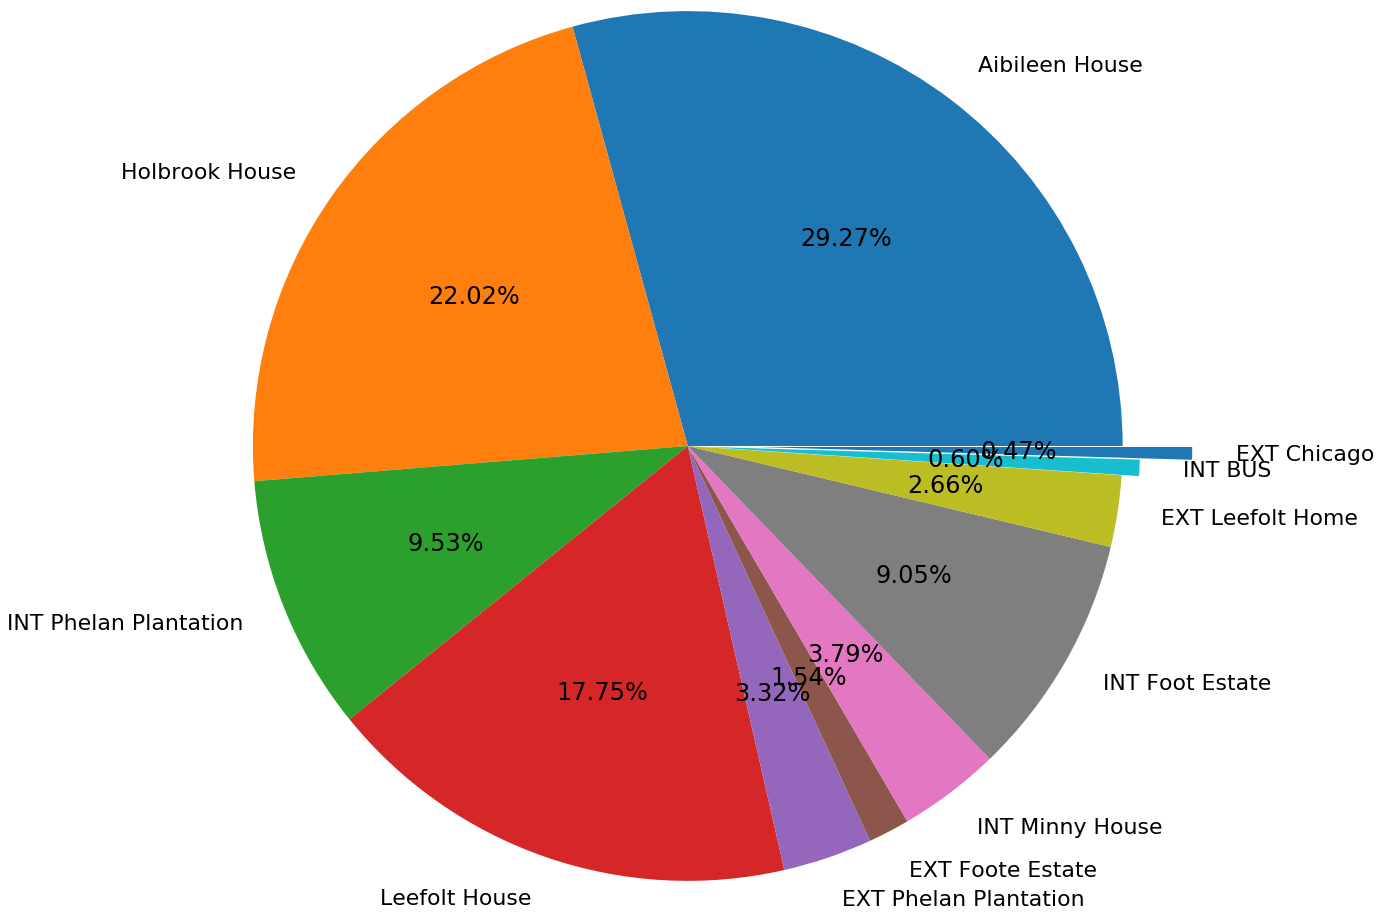

In [584]:
print("Locations film is being shot in:")
plt.pie(values, labels = labelz, radius = 5, autopct ='%0.2f%%', explode=[0,0,0,0,0,0,0,0,0,0.2,0.8] )
plt.show()

In [321]:
tokens = []
for i in loc_df1['setting']:
    tokens.append(word_tokenize(i))
token = [] 
for i in tokens: 
    token.append(i[0])
token

['INT',
 'INT',
 'INT',
 'INT',
 'EXT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'EXT',
 'INT',
 'INT',
 'INT',
 'EXT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'INT',
 'EXT',
 'INT',
 'INT',
 'EXT',
 'EXT',
 'INT',
 'INT',
 'INT',
 'INT',
 'EXT',
 'EXT',
 'INT']

This is a good feature to have when scouting for locations. If majority of the shooting will be outside the producer has to take weather precations and timing depending on how much daylight is required. 

In [322]:
loc_df1['int_ext'] = token
loc_df1

,setting,where,time_of_day,scene,scene_end,script_with_apply,word_count,min_on_screen,int_ext
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",6798,INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILE...,1169,4.878277,INT
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",11866,INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILL...,915,3.926966,INT
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",15420,INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER Mi...,644,2.911985,INT
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",19522,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibil...,737,3.260300,INT
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",21022,EXT. FOOTE ESTATE - BACKYARD - SAME DAY Celia ...,273,1.522472,EXT
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",33712,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY B...,2229,8.848315,INT
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",36790,INT. PHELAN PLANTATION - KITCHEN - MOMENTS LAT...,570,2.634831,INT
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",40229,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY S...,632,2.867041,INT
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40800,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Ralei...,98,0.867041,INT
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",41948,INT. HOLBROOK HOUSE - DEN - LATER THAT DAY The...,207,1.275281,INT


 Time on Screen INTERIOR vs EXTERIOR


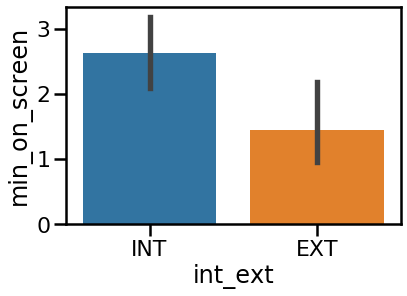

In [588]:
print(' Time on Screen INTERIOR vs EXTERIOR')
sns.barplot('int_ext','min_on_screen', data=loc_df1 )
plt.show()

The time of day feature is useful for producers making a shoot schedule. Thye need to let the cast and crew know things about the shoot. For an example, what type of cloths they should bring, what food is available, how long the shoots are ..

In [436]:
where1

[['NIGHT', 'AIBILEEN', ','],
 ['SAME', 'DAY', 'HILLY'],
 ['MOMENTS', 'LATER'],
 ['CONTINUOUS', 'Aibileen'],
 ['SAME', 'DAY'],
 ['LATER', 'THAT', 'DAY'],
 ['MOMENTS', 'LATER'],
 ['LATER', 'THAT', 'DAY'],
 ['CONTINUOUS', 'Raleigh'],
 ['LATER', 'THAT', 'DAY'],
 ['SECONDS', 'LATER'],
 ['NIGHT', 'Aibileen'],
 ['MOMENTS', 'LATER', 'MINNY'],
 ['CONTINUOUS', 'Aibileen'],
 ['MOMENTS', 'LATER'],
 ['MOMENTS', 'LATER', 'AIBILEEN'],
 ['MORNING', 'Minny'],
 ['MOMENTS', 'LATER'],
 ['SECONDS', 'LATER'],
 ['LATER', 'THAT', 'NIGHT'],
 ['NIGHT', 'Charlotte'],
 ['HOURS', 'LATER'],
 ['SUNRISE', 'The'],
 ['LATER', 'Minny'],
 ['DAY', 'Skeeter'],
 ['MOMENTS', 'LATER'],
 ['LATER', 'THAT', 'AFTERNOON'],
 ['LATER', 'THAT', 'NIGHT'],
 ['MOMENTS', 'LATER'],
 ['LATER', 'THAT', 'DAY'],
 ['DAY', 'Aibileen'],
 ['SECONDS', 'LATER'],
 ['MOMENTS', 'LATER'],
 ['CONTINUOUS', 'The'],
 ['MORNING', 'Aibileen'],
 ['DAY', 'Minny'],
 ['MOMENTS', 'LATER'],
 ['NEXT', 'AFTERNOON'],
 ['MOMENTS', 'LATER'],
 ['MOMENTS', 'LATER'],
 ['L

In [418]:
day = 0

for i in where1: 
#checks if the scene is during the day
    if i[0] == 'DAY':
        day = day+1
    elif len(i)>1 and i[1] == 'DAY' :
            day = day+1
    elif len(i)>2 and i[2] == 'DAY':
        day = day+1
day

13

In [419]:
night = 0 
for i in where1: 
    #checks to see if the scene is at night 
    if i[0] == 'NIGHT':
        night = night+1
    elif len(i)>1 and i[1] == 'NIGHT' :
            night = night+1
    elif len(i)>2 and i[2] == 'NIGHT':
        night = night+1
night

10

In [420]:
print('There are {} night scenes and {} day scenes'.format(night,day))

There are 10 night scenes and 13 day scenes


## Text Analysis

In [437]:
import sklearn
import gensim
from gensim import models
from gensim import corpora, models, similarities 
from gensim.models import Word2Vec
import glob
import multiprocessing
import pprint
import re
import gensim.models.word2vec as w2v
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt

In [443]:
nltk.download('punkt')
nltk.download('stopwords')
#Import Tokenizer to tokenize the script
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christianfreeman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christianfreeman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [444]:
help_raw_script = tokenizer.tokenize(c_help_script)
help_raw_script

[' THE HELP Written by Tate Taylor Based on the novel by Kathryn Stockett Second Draft, November 9, 2009 WILLIAM FAULKNER wrote of Mammy Callie after her death: "...she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love".',
 'JACKSON, MISSISSIPPI 1963 INT.',
 "AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILEEN, black, 53, sits at a table in a small, green kitchen.",
 'She wears a yellow dress with black piping and grips a tattered spiral notebook.',
 'Although cracked, the window behind her is crystal clear.',
 'Three framed portraits hang on the wall above her: John F. Kennedy, Dr. Martin Luther King, Jr. and an UNKNOWN YOUNG BLACK MALE wearing thick glasses.',
 'Aibileen swallows hard.',
 'AIBILEEN I was...born in 1911...on Piedmont Plantation in Cherokee County.',
 'An UNSEEN WOMAN interviews Aibileen.',
 'WOMAN (O.C.)',
 "Did you know as a girl, growing up, that one day you'd be a maid?",
 "AIBILEEN Yes, ma'am

In [ ]:
#a = re.findall(r'\w+(?:-\w+)+',c_help_script)
#a

In [446]:
def script_to_wordlist(raw):
    #cleans the text. Removes special charecters 
    clean= re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [447]:
sentences = []
for raw_script in help_raw_script:
    if len(help_raw_script)>0:
        sentences.append(script_to_wordlist(raw_script))

In [456]:
print(help_raw_script[5])
print(script_to_wordlist(help_raw_script[2]))


Three framed portraits hang on the wall above her: John F. Kennedy, Dr. Martin Luther King, Jr. and an UNKNOWN YOUNG BLACK MALE wearing thick glasses.
['AIBILEEN', 'S', 'HOUSE', 'KITCHEN', 'NIGHT', 'AIBILEEN', 'black', 'sits', 'at', 'a', 'table', 'in', 'a', 'small', 'green', 'kitchen']


In [457]:
help_token_count = sum([len(sentence) for sentence in sentences])
print(help_token_count)

30735


In [458]:
num_features = 300
min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 7
downsampling = 1e-3
seed=1

In [459]:
#word2vec model 
script2vec = w2v.Word2Vec(sg=1,
                          seed=seed,
                          workers=num_workers,
                         size=num_features,
                         min_count=min_word_count,
                         window=context_size,
                         sample=downsampling)

In [460]:
script2vec.build_vocab(sentences)

In [461]:
print('Word2vec vocabulary length:', len(script2vec.wv.vocab))

Word2vec vocabulary length: 1437


In [462]:
#train the model 
script2vec.train(sentences, total_examples=script2vec.corpus_count,epochs=15)

(305832, 461025)

In [463]:
import os
if not os.path.exists('trained'):
    os.makedirs('trained')

In [464]:
script2vec.save(os.path.join('trained', 'script2vec.w2v'))

In [465]:
script2vec_load = w2v.Word2Vec.load(os.path.join('trained', "script2vec.w2v"))


In [467]:
help_vector_matrix = script2vec.wv.syn0
help_vector_matrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


array([[-0.14279976,  0.00109664, -0.04449765, ..., -0.01370408,
        -0.04481427,  0.04078888],
       [-0.13815224,  0.02660802,  0.01530705, ..., -0.00212133,
        -0.0147652 , -0.02354187],
       [-0.06986205,  0.01940388,  0.01215657, ...,  0.00680067,
        -0.04396952,  0.02887124],
       ...,
       [-0.0557688 , -0.00284517,  0.00074075, ...,  0.0006651 ,
        -0.04546481,  0.03038665],
       [-0.05339301,  0.03008384,  0.02205802, ...,  0.01296461,
        -0.05244464,  0.01624467],
       [-0.07510043,  0.03335738,  0.0276319 , ...,  0.02224941,
        -0.05864625,  0.00742885]], dtype=float32)

Create Word Embeddings 

In [468]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [469]:
help_vector_matrix_2d = tsne.fit_transform(help_vector_matrix)

In [470]:
#create a dataframe out of the matrix 
points = pd.DataFrame(
    [
        (word,coords[0], coords[1])
        for word, coords in [
            (word, help_vector_matrix_2d[script2vec.wv.vocab[word].index])
            for word in script2vec.wv.vocab
        ]
    ],

    columns=['word', 'x', 'y'])

In [471]:
points.head(10)

,word,x,y
0,THE,27.909424,30.243252
1,by,-17.046686,21.812284
2,on,-6.065284,24.753632
3,the,-4.401994,44.533726
4,WILLIAM,1.846530,-25.055159
5,wrote,-6.771539,-58.661861
6,of,-18.537075,20.672337
7,after,-16.212267,-53.420700
8,her,0.740000,59.571930
9,she,-27.963144,-30.159372


These coordinates allow me to plot the words on a graph and see what else I can find

In [473]:
sns.set_context("poster")

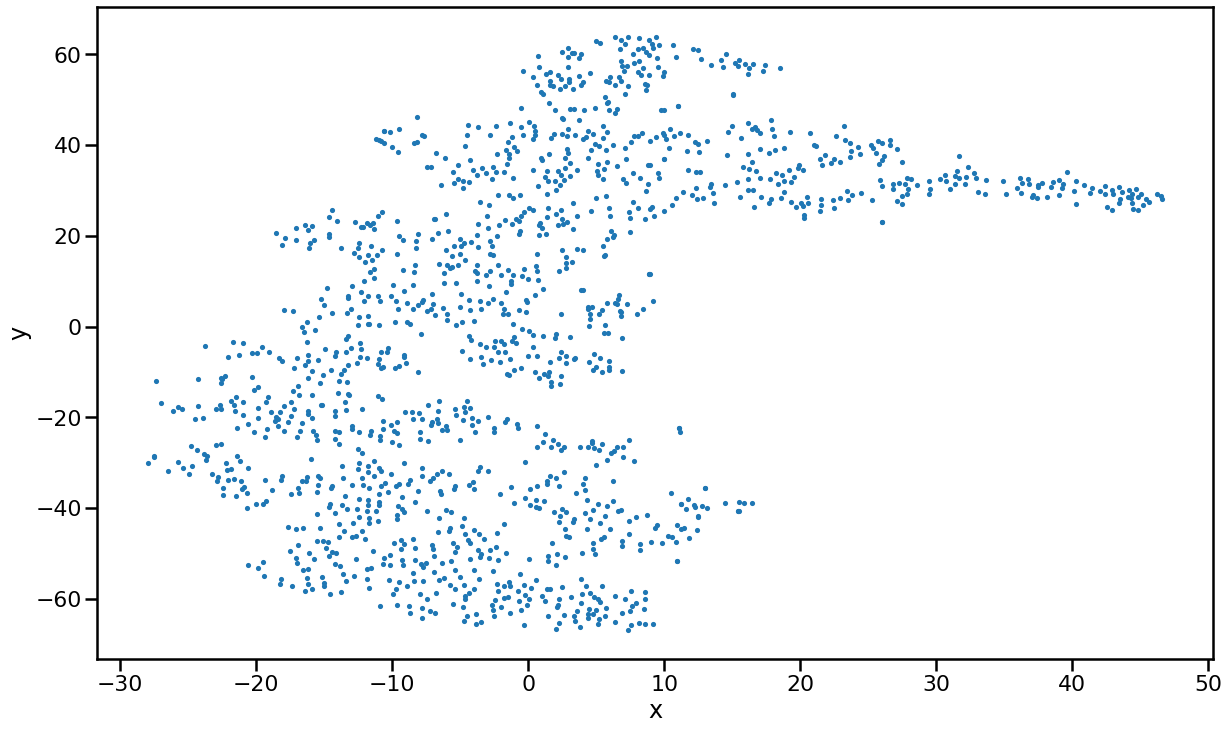

In [474]:
#plot the words to see how they cluster 
points.plot.scatter('x','y',s=10,figsize=(20,12))

There seems to be two large clusters that are bridged together by a sliver of words. I will zoom into that section of words to see whats connecting the clusters.

In [475]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter('x', 'y', s=500, figsize=(20,10))
    #ax = slice.plot.scatter(points.x,points.y, s=10, figsize=(20, 10))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

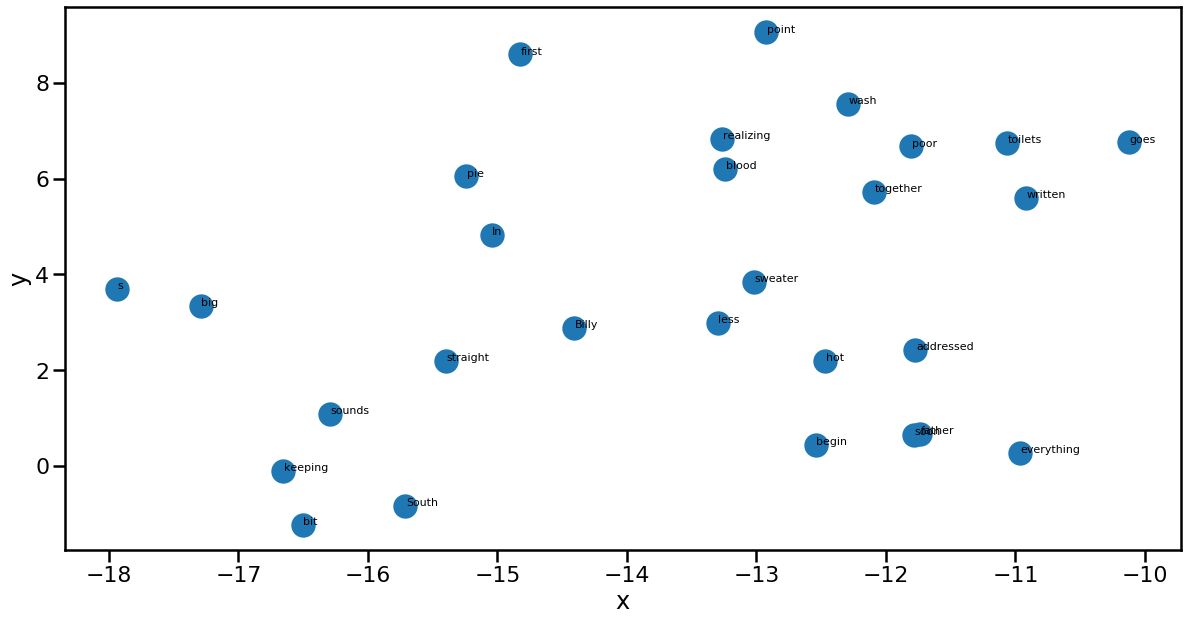

In [592]:
#loook closer into certain clusters 
plot_region(x_bounds=(-20, -10), y_bounds=(-2, 10))

Nothing to intersting.

## Word Similarity

In [601]:
#show most similar words
script2vec.most_similar('Skeeter')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('Stuart', 0.9694850444793701),
 ('William', 0.9647520184516907),
 ('Hilly', 0.9535690546035767),
 ('Jolene', 0.9521088600158691),
 ('writes', 0.9516128301620483),
 ('shaking', 0.950636625289917),
 ('hugs', 0.9501870274543762),
 ('wipes', 0.947939395904541),
 ('ahead', 0.946452260017395),
 ('television', 0.9464108347892761)]

Finding out the word similarity can help determine a feel for the charecters. This is useful when trying to decide on costumes etc.. 

In [478]:
def nearest_similarity_cosmul(start1,end1,end2):
#finds the most smiliar words and compares them
    similarities = script2vec.wv.most_similar_cosmul(
    positive=[end2,start1],
    negative=[end1]
    )
    start2 = similarities[0][0]
    print ("{start1} is related to {end1}, as {start2} is related to {end2}.".format(**locals()))
    
    

In [479]:
nearest_similarity_cosmul('black', 'woman', 'man')

black is related to woman, as bridge is related to man.


In [484]:
c_help_script = c_help_script.lower()


In [482]:
def script_word_frequencies(clean_script, blank_freq_dict):
    #counts how frequent a word appears throughout the script 
    for word in nltk.word_tokenize(clean_script):
        if word not in stopwords:
            if word not in blank_freq_dict.keys():
                blank_freq_dict[word] = 1
            else:
                blank_freq_dict[word] +=1
    return blank_freq_dict

In [481]:
def script_cleaner(c_help_script):
    #cleans removes special characters and makes everything lowercase 
    c_script = c_script.lower()
    script = re.sub('[^a-zA-Z]', ' ', c_script)
    re.sub(r'\s+', ' ', c_script)
    return c_script 

In [483]:
def frequency_score(script_word_freq_count):
    #creates a float int frequency score
    max_freq = max(script_word_freq_count.values())
    for word in script_word_freq_count.keys():
        script_word_freq_count[word] = (script_word_freq_count[word]/max_freq) 
    return script_word_freq_count

In [485]:

def sentence_score (cleaned_script, script_word_freq, script_sent_score ):
    #returns a float int score for each tokenized sentence
    script_sent_token = nltk.sent_tokenize(cleaned_script)
    blank_sent_score = {}
    for sent in script_sent_token:
        for word in nltk.word_tokenize(sent.lower()):
            if word in script_word_freq.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in blank_sent_score.keys():
                        blank_sent_score[sent] = script_word_freq[word]
                    else:
                        
                        blank_sent_score[sent] += script_word_freq[word]
    return blank_sent_score 



In [486]:
#Remove all special charecters 
c_help_no_special = re.sub('[^a-zA-Z]', ' ', c_help_script )
c_help_no_special = re.sub(r'\s+', ' ', c_help_no_special) 

In [487]:
#tokenize the script
help_sent_token_script = nltk.sent_tokenize(c_help_script)
stopwords = nltk.corpus.stopwords.words('english')

In [517]:
#count the frequency for each word
help_word_frequencies = {}
for word in nltk.word_tokenize(c_help_no_special):
    if word not in stopwords:
        if word not in help_word_frequencies.keys():
            help_word_frequencies[word] = 1
        else:
            help_word_frequencies[word] +=1

## Budget Breakdowns

In [602]:
budget = 25000000

In [524]:
word_freq_df = pd.DataFrame.from_dict({'count':help_word_frequencies})
#word_freq_df = word_freq_df.groupby('count')
word_freq_df.sort_values('count', ascending=False)

,count
skeeter,666
aibileen,512
hilly,426
minny,419
celia,231
...,...
infant,1
inflamed,1
inflates,1
inform,1


This feature will help give a base for the actors pay according to screen time. 

In [546]:
#count how many times the charecter appears or has words in the script
word_count_sum = word_freq_df['count'].sum()
pct_of_words = []

for i in word_freq_df['count']:
    if i > 100:
        pct_of_words.append(i/word_count_sum)
    else:
        pct_of_words.append(0)

        
word_freq_df['pct'] = pct_of_words
word_freq_df.sort_values('count',ascending=False)

,count,pct
skeeter,666,0.037530
aibileen,512,0.028852
hilly,426,0.024005
minny,419,0.023611
celia,231,0.013017
...,...,...
infant,1,0.000000
inflamed,1,0.000000
inflates,1,0.000000
inform,1,0.000000


In [553]:
#Calculate suggested salary 
top_charc_freq = word_freq_df.sort_values('count',ascending=False).head()
sug_pay = []
for i in top_charc_freq['pct']:
    sug_pay.append(25000000 * i)
top_charc_freq['suggested_pay'] = sug_pay
top_charc_freq

,count,pct,suggested_pay
skeeter,666,0.037530,938239.603291
aibileen,512,0.028852,721289.304632
hilly,426,0.024005,600135.241745
minny,419,0.023611,590273.864533
celia,231,0.013017,325425.447988


Skeeter, Aibileen, Hilly and Minny have the most lines in the movie(In that specific order). Being that they are main actors, a larger portion of the budget should be set aside for them accordingly. (Budget for this film was 25 million dollars)

In [560]:
#calculate the money left in budget after paying lead actors
budget_after_leads = 25000000 - top_charc_freq['suggested_pay'].sum()
budget_after_leads

21824636.53781134

After paying lead actors, the budget is just under 22 million dollars. This should be allocated to production. 

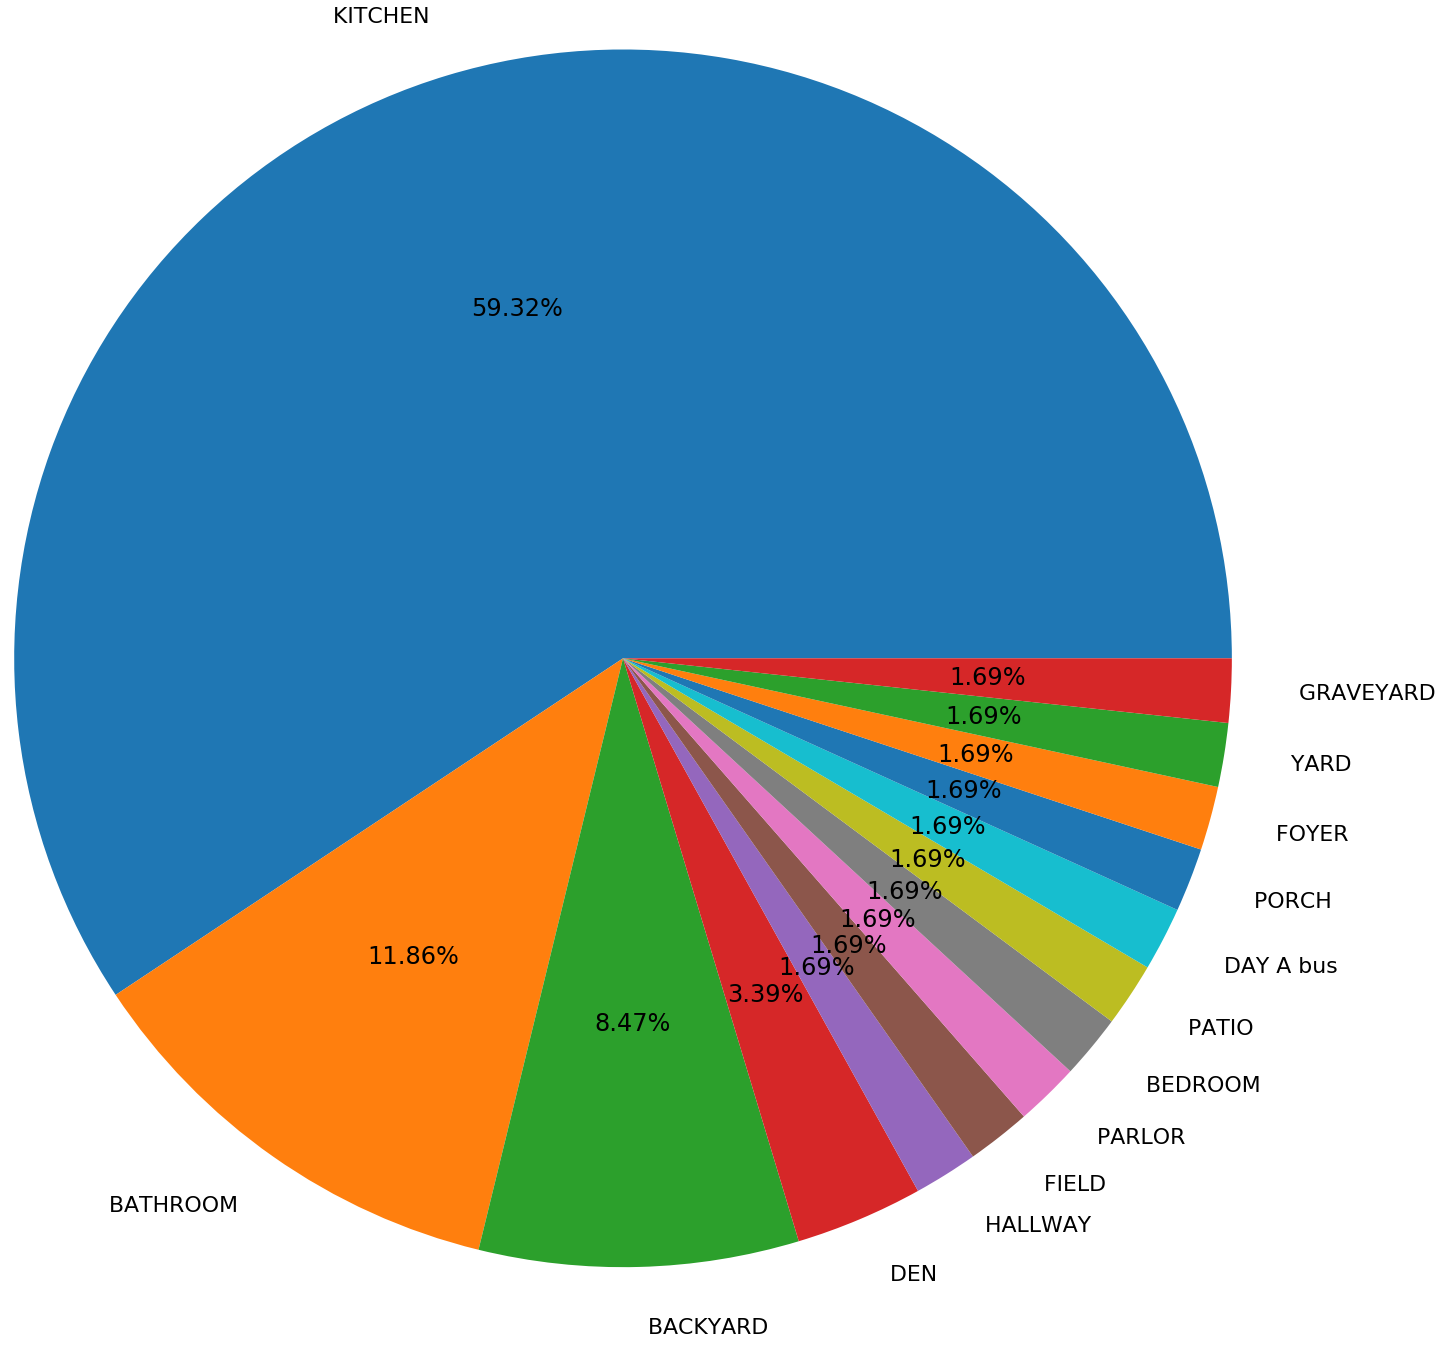

In [579]:
plt.pie(a, labels = loc_df1['where'].unique(), radius = 7, autopct ='%0.2f%%' )
plt.show()


Close to 80% of the film takes place in the kitchen, bathroom, or backyard. A large portion of the remaining budget should allocated to these locations. 

# Conclusion 

From the script a line producer can see where funds should be allocated. In this instance, The Help starts with a 25 million dollar budget. The script is predominantly an interior setting, most common places being a kitchen, bathroom, and a backyard. knowing that majority of the film is set in these locations, producers can set aside the monies to ensure these sets are built to the highest standards. This information also allows the producer to be more flexible when needing to move money around to other portions of the productions. 
From the data collected, this script has 5 main actors. While salary for these actors is very subjective and many factors come into play when determining the salary — screen time is a good place to start just to set a baseline. With this data I calculated a rate according to the budget and the time that they spend on screen.  